In [11]:
import os
import logging
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Phrases, LdaModel
from gensim.models import phrases
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from pprint import pprint

class TopicModeler:
    def __init__(self, input_path):
        self.input_path = input_path
        self.docs = []
        self.dictionary = None
        self.corpus = None
        self.model = None
        self.tokenizer = RegexpTokenizer(r'\w+')
        self.lemmatizer = WordNetLemmatizer()
        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    def load_documents(self):
        for filename in os.listdir(self.input_path):
            with open(os.path.join(self.input_path, filename), 'r', encoding='utf-8') as f:
                self.docs.append(f.read())
        print(f"Loaded {len(self.docs)} documents")
        if self.docs:
            print(f"Sample document: {self.docs[0][:100]}...")  

    def preprocess_documents(self):
        self.docs = [[token.lower() for token in self.tokenizer.tokenize(doc)] for doc in self.docs]
        
        self.docs = [[token for token in doc if not token.isnumeric() and len(token) > 1] for doc in self.docs]
        
        stop_words = set(stopwords.words('english'))
        self.docs = [[word for word in doc if word not in stop_words] for doc in self.docs]
        
        self.docs = [[self.lemmatizer.lemmatize(token) for token in doc] for doc in self.docs]

        print(f"After preprocessing: {len(self.docs)} documents")
        if self.docs:
            print(f"Sample preprocessed document: {self.docs[0][:10]}...") 

    def add_bigrams(self):
        bigram = Phrases(self.docs, min_count=5, threshold=100)
        for idx in range(len(self.docs)):
            for token in bigram[self.docs[idx]]:
                if '_' in token:
                    self.docs[idx].append(token)
        print(f"Added bigrams. Sample document: {self.docs[0][:15]}...")

    def create_dictionary_and_corpus(self):
        self.dictionary = Dictionary(self.docs)
        original_size = len(self.dictionary)
        self.dictionary.filter_extremes(no_below=2, no_above=0.9)
        self.corpus = [self.dictionary.doc2bow(doc) for doc in self.docs]
        print(f"Dictionary size: {len(self.dictionary)} (reduced from {original_size})")
        print(f"Corpus size: {len(self.corpus)}")
        if self.corpus:
            print(f"Sample corpus entry: {self.corpus[0][:10]}") 

    def train_lda_model(self, num_topics=6, chunksize=2000, passes=20, iterations=400):
        if not self.corpus or not self.dictionary:
            raise ValueError("Corpus or dictionary is empty. Check your preprocessing steps.")
        self.model = LdaModel(
            corpus=self.corpus,
            id2word=self.dictionary,
            chunksize=chunksize,
            alpha='auto',
            eta='auto',
            iterations=iterations,
            num_topics=num_topics,
            passes=passes,
            eval_every=None,
            random_state=42
        )
        print("LDA model trained successfully")

    def print_model_info(self):
        print('Number of unique tokens: %d' % len(self.dictionary))
        print('Number of documents: %d' % len(self.corpus))
        
        top_topics = self.model.top_topics(self.corpus)
        avg_topic_coherence = sum([t[1] for t in top_topics]) / self.model.num_topics
        print('Average topic coherence: %.4f.' % avg_topic_coherence)
        
        print("\nTop topics:")
        pprint(self.model.print_topics())
        
        print('\nPerplexity: ', self.model.log_perplexity(self.corpus))
        
        coherence_model_lda = CoherenceModel(model=self.model, texts=self.docs, dictionary=self.dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print('\nCoherence Score: ', coherence_lda)

    def visualize_topics(self):
        vis = pyLDAvis.gensim.prepare(self.model, self.corpus, self.dictionary)
        return vis

    def analyze_documents(self):
        for i, doc in enumerate(self.docs[:5]): 
            bow = self.dictionary.doc2bow(doc)
            doc_topics = self.model.get_document_topics(bow)
            print(f"\nDocument {i} topics:")
            pprint(doc_topics)
            best_topic = max(doc_topics, key=lambda x: x[1])
            print(f"Best topic: {best_topic[0]}")
            print(f"Top words in this topic:")
            pprint(self.model.show_topic(best_topic[0]))
            print(f"Original document: {' '.join(doc[:30])}...")  # Print first 30 words
            print()

    def run(self):
        try:
            self.load_documents()
            self.preprocess_documents()
            self.add_bigrams()
            self.create_dictionary_and_corpus()
            self.train_lda_model()
            self.print_model_info()
            vis = self.visualize_topics()
            self.analyze_documents()
            return vis
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            raise

# Usage
if __name__ == "__main__":
    modeler = TopicModeler('txt')  
    vis = modeler.run()
    
    # Save visualization
    pyLDAvis.save_html(vis, 'lda_visualization.html')
    print("Visualization saved as 'lda_visualization.html'")


Running model with parameters: num_topics=5, chunksize=2000, passes=10, iterations=200
An error occurred: [Errno 2] No such file or directory: 'input'


FileNotFoundError: [Errno 2] No such file or directory: 'input'

In [15]:
import os
import logging
import pickle
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Phrases, LdaModel
from gensim.models import phrases
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from pprint import pprint

class TopicModeler:
    def __init__(self, input_path):
        self.input_path = input_path
        self.docs = []
        self.dictionary = None
        self.corpus = None
        self.model = None
        self.tokenizer = RegexpTokenizer(r'\w+')
        self.lemmatizer = WordNetLemmatizer()
        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    def load_documents(self):
        for filename in os.listdir(self.input_path):
            file_path = os.path.join(self.input_path, filename)
            if os.path.isfile(file_path) and filename.endswith('.txt'):  # Ensure it's a text file
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read().strip()
                    if isinstance(content, str):
                        self.docs.append(content)
        print(f"Loaded {len(self.docs)} documents")
        if self.docs:
            print(f"Sample document: {self.docs[0][:100]}...")

    def preprocess_documents(self): # filtering 
        self.docs = [[token.lower() for token in self.tokenizer.tokenize(doc)] for doc in self.docs if isinstance(doc, str)]
        self.docs = [[token for token in doc if not token.isnumeric() and len(token) > 1] for doc in self.docs]
        stop_words = set(stopwords.words('english'))
        self.docs = [[word for word in doc if word not in stop_words] for doc in self.docs]
        self.docs = [[self.lemmatizer.lemmatize(token) for token in doc] for doc in self.docs]
        print(f"After preprocessing: {len(self.docs)} documents")
        if self.docs:
            print(f"Sample preprocessed document: {self.docs[0][:10]}...")

    def add_bigrams(self):
        bigram = Phrases(self.docs, min_count=5, threshold=100)
        for idx in range(len(self.docs)):
            for token in bigram[self.docs[idx]]:
                if '_' in token:
                    self.docs[idx].append(token)
        print(f"Added bigrams. Sample document: {self.docs[0][:15]}...")

    def create_dictionary_and_corpus(self):
        self.dictionary = Dictionary(self.docs)
        original_size = len(self.dictionary)
        self.dictionary.filter_extremes(no_below=2, no_above=0.9)
        self.corpus = [self.dictionary.doc2bow(doc) for doc in self.docs]
        print(f"Dictionary size: {len(self.dictionary)} (reduced from {original_size})")
        print(f"Corpus size: {len(self.corpus)}")
        if self.corpus:
            print(f"Sample corpus entry: {self.corpus[0][:10]}")

    def train_lda_model(self, num_topics=6, chunksize=2000, passes=20, iterations=400, alpha='auto', eta='auto'):
        if not self.corpus or not self.dictionary:
            raise ValueError("Corpus or dictionary is empty. Check your preprocessing steps.")
        
        print(f"Training LDA model with num_topics={num_topics}, chunksize={chunksize}, passes={passes}, iterations={iterations}, alpha={alpha}, eta={eta}")
        
        self.model = LdaModel(
            corpus=self.corpus,
            id2word=self.dictionary,
            chunksize=chunksize,
            alpha=alpha,
            eta=eta,
            iterations=iterations,
            num_topics=num_topics,
            passes=passes,
            eval_every=None,
            random_state=42
        )
        print("LDA model trained successfully")

    def print_model_info(self):
        print('Number of unique tokens: %d' % len(self.dictionary))
        print('Number of documents: %d' % len(self.corpus))
        top_topics = self.model.top_topics(self.corpus)
        avg_topic_coherence = sum([t[1] for t in top_topics]) / self.model.num_topics
        print('Average topic coherence: %.4f.' % avg_topic_coherence)
        print("\nTop topics:")
        pprint(self.model.print_topics())
        print('\nPerplexity: ', self.model.log_perplexity(self.corpus))
        coherence_model_lda = CoherenceModel(model=self.model, texts=self.docs, dictionary=self.dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print('\nCoherence Score: ', coherence_lda)

    def visualize_topics(self):
        vis = pyLDAvis.gensim.prepare(self.model, self.corpus, self.dictionary)
        return vis

    def analyze_documents(self):
        for i, doc in enumerate(self.docs[:5]):
            bow = self.dictionary.doc2bow(doc)
            doc_topics = self.model.get_document_topics(bow)
            print(f"\nDocument {i} topics:")
            pprint(doc_topics)
            best_topic = max(doc_topics, key=lambda x: x[1])
            print(f"Best topic: {best_topic[0]}")
            print(f"Top words in this topic:")
            pprint(self.model.show_topic(best_topic[0]))
            print(f"Original document: {' '.join(doc[:30])}...")
            print()

    def save_model(self, file_path):
        if self.model is None:
            raise ValueError("No model has been trained yet.")
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        self.model.save(file_path)
        print(f"Model saved to {file_path}")

    def load_model(self, file_path):
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"No model file found at {file_path}")
        self.model = LdaModel.load(file_path)
        print(f"Model loaded from {file_path}")

    def save_dictionary_and_corpus(self, dict_path, corpus_path):
        if self.dictionary is None or self.corpus is None:
            raise ValueError("Dictionary and corpus have not been created yet.")
        os.makedirs(os.path.dirname(dict_path), exist_ok=True)
        os.makedirs(os.path.dirname(corpus_path), exist_ok=True)
        self.dictionary.save(dict_path)
        with open(corpus_path, 'wb') as f:
            pickle.dump(self.corpus, f)
        print(f"Dictionary saved to {dict_path}")
        print(f"Corpus saved to {corpus_path}")

    def load_dictionary_and_corpus(self, dict_path, corpus_path):
        if not os.path.exists(dict_path) or not os.path.exists(corpus_path):
            raise FileNotFoundError(f"Dictionary or corpus file not found.")
        self.dictionary = Dictionary.load(dict_path)
        with open(corpus_path, 'rb') as f:
            self.corpus = pickle.load(f)
        print(f"Dictionary loaded from {dict_path}")
        print(f"Corpus loaded from {corpus_path}")

    def run_with_params(self, num_topics, chunksize, passes, iterations):
        try:
            self.load_documents()
            self.preprocess_documents()
            self.add_bigrams()
            self.create_dictionary_and_corpus()
            self.train_lda_model(num_topics=num_topics, chunksize=chunksize, passes=passes, iterations=iterations)
            model_dir = f"lda_models/topics_{num_topics}_passes_{passes}_iterations_{iterations}"
            self.save_model(os.path.join(model_dir, 'trained_model'))
            self.save_dictionary_and_corpus(os.path.join(model_dir, 'dictionary'), os.path.join(model_dir, 'corpus'))
            self.print_model_info()
            vis = self.visualize_topics()
            pyLDAvis.save_html(vis, os.path.join(model_dir, 'lda_visualization.html'))
            self.analyze_documents()
            return vis
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            raise

if __name__ == "__main__":
    modeler = TopicModeler('txt')

    param_combinations = [
        (5, 2000, 10, 200),
        (10, 2000, 10, 400),
        (15, 2000, 20, 200),
        (10, 2000, 20, 400)
    ]

    for num_topics, chunksize, passes, iterations in param_combinations:
        print(f"\nRunning model with parameters: num_topics={num_topics}, chunksize={chunksize}, passes={passes}, iterations={iterations}")
        modeler.run_with_params(num_topics, chunksize, passes, iterations)


Running model with parameters: num_topics=5, chunksize=2000, passes=10, iterations=200
Loaded 440 documents
Sample document: Pricing for interconnection related to the provision of number portability, as referred to in Articl...


2024-08-02 16:27:06,620 : INFO : collecting all words and their counts
2024-08-02 16:27:06,621 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-08-02 16:27:06,645 : INFO : collected 23445 token types (unigram + bigrams) from a corpus of 44718 words and 440 sentences
2024-08-02 16:27:06,646 : INFO : merged Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2024-08-02 16:27:06,647 : INFO : Phrases lifecycle event {'msg': 'built Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.03s', 'datetime': '2024-08-02T16:27:06.646849', 'gensim': '4.3.2', 'python': '3.11.9 (main, Jul 16 2024, 11:07:54) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.5-arm64-arm-64bit', 'event': 'created'}
2024-08-02 16:27:06,682 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-08-02 16:27:06,704 : INFO : built Dictionary<3666 unique tokens: ['abstract', 'account', 'adoption', 'advance', 'appeal']...> from 440

After preprocessing: 440 documents
Sample preprocessed document: ['pricing', 'interconnection', 'related', 'provision', 'number', 'portability', 'referred', 'article', 'directive', 'ec']...
Added bigrams. Sample document: ['pricing', 'interconnection', 'related', 'provision', 'number', 'portability', 'referred', 'article', 'directive', 'ec', 'european', 'parliament', 'council', 'march', 'universal']...
Dictionary size: 2035 (reduced from 3666)
Corpus size: 440
Sample corpus entry: [(0, 1), (1, 1), (2, 1), (3, 3), (4, 3), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1)]
Training LDA model with num_topics=5, chunksize=2000, passes=10, iterations=200, alpha=auto, eta=auto


2024-08-02 16:27:07,041 : INFO : optimized alpha [0.13063243, 0.11703815, 0.06443559, 0.13090336, 0.02856037]
2024-08-02 16:27:07,043 : INFO : topic #0 (0.131): 0.028*"article" + 0.028*"directive" + 0.019*"ec" + 0.019*"council" + 0.018*"european" + 0.017*"regulation" + 0.014*"consumer" + 0.014*"must" + 0.013*"parliament" + 0.013*"service"
2024-08-02 16:27:07,044 : INFO : topic #1 (0.117): 0.034*"directive" + 0.022*"article" + 0.017*"must" + 0.016*"national" + 0.013*"interpreted" + 0.013*"consumer" + 0.013*"service" + 0.012*"council" + 0.011*"court" + 0.011*"law"
2024-08-02 16:27:07,044 : INFO : topic #2 (0.064): 0.032*"directive" + 0.031*"consumer" + 0.020*"council" + 0.018*"contract" + 0.017*"article" + 0.014*"term" + 0.012*"must" + 0.011*"european" + 0.010*"ec" + 0.010*"interpreted"
2024-08-02 16:27:07,045 : INFO : topic #3 (0.131): 0.027*"directive" + 0.021*"article" + 0.021*"consumer" + 0.021*"council" + 0.017*"ec" + 0.016*"term" + 0.015*"court" + 0.015*"must" + 0.014*"unfair" + 0.

LDA model trained successfully
Model saved to lda_models/topics_5_passes_10_iterations_200/trained_model
Dictionary saved to lda_models/topics_5_passes_10_iterations_200/dictionary
Corpus saved to lda_models/topics_5_passes_10_iterations_200/corpus
Number of unique tokens: 2035
Number of documents: 440
Average topic coherence: -1.0921.

Top topics:
[(0,
  '0.032*"directive" + 0.030*"ec" + 0.027*"article" + 0.027*"council" + '
  '0.026*"european" + 0.022*"regulation" + 0.022*"parliament" + 0.014*"must" + '
  '0.013*"meaning" + 0.012*"interpreted"'),
 (1,
  '0.037*"directive" + 0.023*"article" + 0.022*"service" + 0.016*"must" + '
  '0.014*"national" + 0.013*"interpreted" + 0.012*"state" + 0.012*"cost" + '
  '0.011*"council" + 0.010*"law"'),
 (2,
  '0.036*"consumer" + 0.036*"directive" + 0.020*"contract" + 0.018*"article" + '
  '0.017*"council" + 0.015*"term" + 0.013*"must" + 0.011*"eec" + '
  '0.011*"interpreted" + 0.010*"agreement"'),
 (3,
  '0.033*"consumer" + 0.029*"term" + 0.026*"dir

2024-08-02 16:27:08,837 : INFO : 2 batches submitted to accumulate stats from 128 documents (347 virtual)
2024-08-02 16:27:08,842 : INFO : 3 batches submitted to accumulate stats from 192 documents (1274 virtual)
2024-08-02 16:27:09,963 : INFO : 9 accumulators retrieved from output queue
2024-08-02 16:27:09,979 : INFO : accumulated word occurrence stats for 11447 virtual documents



Coherence Score:  0.4517129413820314
An error occurred: 'TopicModeler' object has no attribute 'coherence_scores'


AttributeError: 'TopicModeler' object has no attribute 'coherence_scores'

2024-08-02 16:28:16,223 : INFO : collecting all words and their counts
2024-08-02 16:28:16,224 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types



Running model with parameters: num_topics=5, chunksize=2000, passes=10, iterations=200
Loaded 440 documents
Sample document: Pricing for interconnection related to the provision of number portability, as referred to in Articl...
After preprocessing: 440 documents
Sample preprocessed document: ['pricing', 'interconnection', 'related', 'provision', 'number', 'portability', 'referred', 'article', 'directive', 'ec']...


2024-08-02 16:28:16,248 : INFO : collected 23445 token types (unigram + bigrams) from a corpus of 44718 words and 440 sentences
2024-08-02 16:28:16,249 : INFO : merged Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2024-08-02 16:28:16,250 : INFO : Phrases lifecycle event {'msg': 'built Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.03s', 'datetime': '2024-08-02T16:28:16.250319', 'gensim': '4.3.2', 'python': '3.11.9 (main, Jul 16 2024, 11:07:54) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.5-arm64-arm-64bit', 'event': 'created'}
2024-08-02 16:28:16,294 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-08-02 16:28:16,313 : INFO : built Dictionary<3666 unique tokens: ['abstract', 'account', 'adoption', 'advance', 'appeal']...> from 440 documents (total 46957 corpus positions)
2024-08-02 16:28:16,313 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3666 unique tokens: ['abstract', 'acc

Added bigrams. Sample document: ['pricing', 'interconnection', 'related', 'provision', 'number', 'portability', 'referred', 'article', 'directive', 'ec', 'european', 'parliament', 'council', 'march', 'universal']...
Dictionary size: 2035 (reduced from 3666)
Corpus size: 440
Sample corpus entry: [(0, 1), (1, 1), (2, 1), (3, 3), (4, 3), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1)]
Training LDA model with num_topics=5, chunksize=2000, passes=10, iterations=200, alpha=auto, eta=auto


2024-08-02 16:28:16,638 : INFO : optimized alpha [0.13063243, 0.11703815, 0.06443559, 0.13090336, 0.02856037]
2024-08-02 16:28:16,639 : INFO : topic #0 (0.131): 0.028*"article" + 0.028*"directive" + 0.019*"ec" + 0.019*"council" + 0.018*"european" + 0.017*"regulation" + 0.014*"consumer" + 0.014*"must" + 0.013*"parliament" + 0.013*"service"
2024-08-02 16:28:16,639 : INFO : topic #1 (0.117): 0.034*"directive" + 0.022*"article" + 0.017*"must" + 0.016*"national" + 0.013*"interpreted" + 0.013*"consumer" + 0.013*"service" + 0.012*"council" + 0.011*"court" + 0.011*"law"
2024-08-02 16:28:16,640 : INFO : topic #2 (0.064): 0.032*"directive" + 0.031*"consumer" + 0.020*"council" + 0.018*"contract" + 0.017*"article" + 0.014*"term" + 0.012*"must" + 0.011*"european" + 0.010*"ec" + 0.010*"interpreted"
2024-08-02 16:28:16,640 : INFO : topic #3 (0.131): 0.027*"directive" + 0.021*"article" + 0.021*"consumer" + 0.021*"council" + 0.017*"ec" + 0.016*"term" + 0.015*"court" + 0.015*"must" + 0.014*"unfair" + 0.

LDA model trained successfully
Model saved to lda_models/topics_5_passes_10_iterations_200/trained_model
Dictionary saved to lda_models/topics_5_passes_10_iterations_200/dictionary
Corpus saved to lda_models/topics_5_passes_10_iterations_200/corpus
Number of unique tokens: 2035
Number of documents: 440
Average topic coherence: -1.0921.

Top topics:
[(0,
  '0.032*"directive" + 0.030*"ec" + 0.027*"article" + 0.027*"council" + '
  '0.026*"european" + 0.022*"regulation" + 0.022*"parliament" + 0.014*"must" + '
  '0.013*"meaning" + 0.012*"interpreted"'),
 (1,
  '0.037*"directive" + 0.023*"article" + 0.022*"service" + 0.016*"must" + '
  '0.014*"national" + 0.013*"interpreted" + 0.012*"state" + 0.012*"cost" + '
  '0.011*"council" + 0.010*"law"'),
 (2,
  '0.036*"consumer" + 0.036*"directive" + 0.020*"contract" + 0.018*"article" + '
  '0.017*"council" + 0.015*"term" + 0.013*"must" + 0.011*"eec" + '
  '0.011*"interpreted" + 0.010*"agreement"'),
 (3,
  '0.033*"consumer" + 0.029*"term" + 0.026*"dir

2024-08-02 16:28:17,728 : INFO : -6.273 per-word bound, 77.3 perplexity estimate based on a held-out corpus of 440 documents with 44579 words
2024-08-02 16:28:17,729 : INFO : using ParallelWordOccurrenceAccumulator<processes=9, batch_size=64> to estimate probabilities from sliding windows



Perplexity:  -6.273072865441498


2024-08-02 16:28:18,528 : INFO : 2 batches submitted to accumulate stats from 128 documents (347 virtual)
2024-08-02 16:28:18,580 : INFO : 3 batches submitted to accumulate stats from 192 documents (1274 virtual)
2024-08-02 16:28:19,642 : INFO : 9 accumulators retrieved from output queue
2024-08-02 16:28:19,655 : INFO : accumulated word occurrence stats for 11447 virtual documents



Coherence Score:  0.4517129413820314


2024-08-02 16:28:21,007 : INFO : collecting all words and their counts
2024-08-02 16:28:21,007 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-08-02 16:28:21,028 : INFO : collected 23445 token types (unigram + bigrams) from a corpus of 44718 words and 440 sentences
2024-08-02 16:28:21,029 : INFO : merged Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2024-08-02 16:28:21,029 : INFO : Phrases lifecycle event {'msg': 'built Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.02s', 'datetime': '2024-08-02T16:28:21.029382', 'gensim': '4.3.2', 'python': '3.11.9 (main, Jul 16 2024, 11:07:54) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.5-arm64-arm-64bit', 'event': 'created'}
2024-08-02 16:28:21,064 : INFO : adding document #0 to Dictionary<0 unique tokens: []>



Document 0 topics:
[(1, 0.9984667)]
Best topic: 1
Top words in this topic:
[('directive', 0.037215818),
 ('article', 0.023045152),
 ('service', 0.021931587),
 ('must', 0.01592759),
 ('national', 0.013697454),
 ('interpreted', 0.012828682),
 ('state', 0.011819984),
 ('cost', 0.011662337),
 ('council', 0.010960338),
 ('law', 0.010464187)]
Original document: pricing interconnection related provision number portability referred article directive ec european parliament council march universal service user right relating electronic communication network service universal service directive concern traffic cost number...


Document 1 topics:
[(0, 0.694997), (2, 0.30318424)]
Best topic: 0
Top words in this topic:
[('directive', 0.032075357),
 ('ec', 0.029609142),
 ('article', 0.027314719),
 ('council', 0.026978357),
 ('european', 0.025506597),
 ('regulation', 0.0223595),
 ('parliament', 0.022057863),
 ('must', 0.014074753),
 ('meaning', 0.013009776),
 ('interpreted', 0.011972018)]
Original doc

2024-08-02 16:28:21,082 : INFO : built Dictionary<3666 unique tokens: ['abstract', 'account', 'adoption', 'advance', 'appeal']...> from 440 documents (total 46957 corpus positions)
2024-08-02 16:28:21,082 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<3666 unique tokens: ['abstract', 'account', 'adoption', 'advance', 'appeal']...> from 440 documents (total 46957 corpus positions)", 'datetime': '2024-08-02T16:28:21.082842', 'gensim': '4.3.2', 'python': '3.11.9 (main, Jul 16 2024, 11:07:54) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.5-arm64-arm-64bit', 'event': 'created'}
2024-08-02 16:28:21,084 : INFO : discarding 1631 tokens: [('abstract', 1), ('confidential', 1), ('confidentiality', 1), ('dissuaded', 1), ('donor', 1), ('ported', 1), ('porting', 1), ('reaching', 1), ('becomes', 1), ('referral', 1)]...
2024-08-02 16:28:21,084 : INFO : keeping 2035 tokens which were in no less than 2 and no more than 396 (=90.0%) documents
2024-08-02 16:28:21,086 : INFO :

Dictionary size: 2035 (reduced from 3666)
Corpus size: 440
Sample corpus entry: [(0, 1), (1, 1), (2, 1), (3, 3), (4, 3), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1)]
Training LDA model with num_topics=10, chunksize=2000, passes=10, iterations=400, alpha=auto, eta=auto


2024-08-02 16:28:21,512 : INFO : optimized alpha [0.06066988, 0.06254108, 0.04875785, 0.06051423, 0.04978949, 0.05782237, 0.04971424, 0.10029747, 0.0841781, 0.052986026]
2024-08-02 16:28:21,514 : INFO : topic #2 (0.049): 0.026*"consumer" + 0.022*"directive" + 0.015*"contract" + 0.011*"article" + 0.011*"proceeding" + 0.011*"must" + 0.010*"may" + 0.010*"council" + 0.009*"good" + 0.009*"property"
2024-08-02 16:28:21,514 : INFO : topic #6 (0.050): 0.022*"directive" + 0.018*"article" + 0.016*"court" + 0.014*"law" + 0.014*"consumer" + 0.014*"rule" + 0.013*"publication" + 0.013*"version" + 0.013*"must" + 0.013*"office"
2024-08-02 16:28:21,514 : INFO : topic #1 (0.063): 0.032*"directive" + 0.021*"article" + 0.020*"must" + 0.015*"service" + 0.015*"national" + 0.015*"interpreted" + 0.015*"state" + 0.013*"law" + 0.013*"member" + 0.012*"council"
2024-08-02 16:28:21,515 : INFO : topic #8 (0.084): 0.029*"consumer" + 0.026*"term" + 0.026*"directive" + 0.020*"article" + 0.018*"national" + 0.018*"contr

LDA model trained successfully
Model saved to lda_models/topics_10_passes_10_iterations_400/trained_model
Dictionary saved to lda_models/topics_10_passes_10_iterations_400/dictionary
Corpus saved to lda_models/topics_10_passes_10_iterations_400/corpus
Number of unique tokens: 2035
Number of documents: 440
Average topic coherence: -1.2772.

Top topics:
[(0,
  '0.034*"article" + 0.028*"directive" + 0.025*"service" + 0.025*"european" + '
  '0.023*"regulation" + 0.017*"must" + 0.017*"parliament" + 0.017*"ec" + '
  '0.017*"council" + 0.014*"electronic"'),
 (1,
  '0.035*"directive" + 0.022*"article" + 0.020*"state" + 0.019*"service" + '
  '0.019*"must" + 0.017*"member" + 0.015*"interpreted" + 0.014*"national" + '
  '0.010*"advertising" + 0.010*"council"'),
 (2,
  '0.037*"consumer" + 0.027*"contract" + 0.027*"directive" + 0.020*"good" + '
  '0.016*"business" + 0.015*"conformity" + 0.014*"person" + 0.013*"must" + '
  '0.013*"property" + 0.012*"right"'),
 (3,
  '0.045*"directive" + 0.041*"ec" +

2024-08-02 16:28:23,157 : INFO : 2 batches submitted to accumulate stats from 128 documents (347 virtual)
2024-08-02 16:28:23,160 : INFO : 3 batches submitted to accumulate stats from 192 documents (1274 virtual)
2024-08-02 16:28:24,092 : INFO : 9 accumulators retrieved from output queue
2024-08-02 16:28:24,111 : INFO : accumulated word occurrence stats for 11447 virtual documents



Coherence Score:  0.5399519751262403


2024-08-02 16:28:24,781 : INFO : collecting all words and their counts
2024-08-02 16:28:24,781 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-08-02 16:28:24,803 : INFO : collected 23445 token types (unigram + bigrams) from a corpus of 44718 words and 440 sentences
2024-08-02 16:28:24,803 : INFO : merged Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2024-08-02 16:28:24,803 : INFO : Phrases lifecycle event {'msg': 'built Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.02s', 'datetime': '2024-08-02T16:28:24.803795', 'gensim': '4.3.2', 'python': '3.11.9 (main, Jul 16 2024, 11:07:54) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.5-arm64-arm-64bit', 'event': 'created'}
2024-08-02 16:28:24,837 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-08-02 16:28:24,857 : INFO : built Dictionary<3666 unique tokens: ['abstract', 'account', 'adoption', 'advance', 'appeal']...> from 440


Document 0 topics:
[(0, 0.4198081), (1, 0.16470215), (7, 0.41346726)]
Best topic: 0
Top words in this topic:
[('article', 0.034071207),
 ('directive', 0.028497979),
 ('service', 0.02496325),
 ('european', 0.024681337),
 ('regulation', 0.022914737),
 ('must', 0.017408734),
 ('parliament', 0.01719439),
 ('ec', 0.01712989),
 ('council', 0.016601361),
 ('electronic', 0.01370838)]
Original document: pricing interconnection related provision number portability referred article directive ec european parliament council march universal service user right relating electronic communication network service universal service directive concern traffic cost number...


Document 1 topics:
[(2, 0.30878347), (6, 0.5060197), (7, 0.1818238)]
Best topic: 6
Top words in this topic:
[('version', 0.036642633),
 ('publication', 0.03616074),
 ('office', 0.035242297),
 ('court', 0.02304075),
 ('eu', 0.022922402),
 ('ground', 0.02285518),
 ('chamber', 0.022339586),
 ('hereby', 0.021857452),
 ('rule', 0.020887338

2024-08-02 16:28:24,875 : INFO : using autotuned alpha, starting with [0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667]
2024-08-02 16:28:24,876 : INFO : using serial LDA version on this node
2024-08-02 16:28:24,878 : INFO : running online (multi-pass) LDA training, 15 topics, 20 passes over the supplied corpus of 440 documents, updating model once every 440 documents, evaluating perplexity every 0 documents, iterating 200x with a convergence threshold of 0.001000
2024-08-02 16:28:24,879 : INFO : PROGRESS: pass 0, at document #440/440
2024-08-02 16:28:25,175 : INFO : optimized alpha [0.05106003, 0.05195589, 0.045541946, 0.05223167, 0.04650121, 0.049655452, 0.046322152, 0.07450229, 0.06759623, 0.04858338, 0.046477057, 0.052046366, 0.047857948, 0.048518304, 0.04465681]
2024-08-02 16:28:25,177 : INFO : topic #14 (0.045): 0.019*"directive" + 0.012*"court" + 0.01

LDA model trained successfully
Model saved to lda_models/topics_15_passes_20_iterations_200/trained_model
Dictionary saved to lda_models/topics_15_passes_20_iterations_200/dictionary
Corpus saved to lda_models/topics_15_passes_20_iterations_200/corpus
Number of unique tokens: 2035
Number of documents: 440
Average topic coherence: -1.8805.

Top topics:
[(0,
  '0.034*"article" + 0.028*"de" + 0.023*"regulation" + 0.021*"directive" + '
  '0.019*"must" + 0.017*"european" + 0.017*"information" + 0.016*"ec" + '
  '0.014*"parliament" + 0.014*"food"'),
 (1,
  '0.033*"directive" + 0.022*"article" + 0.021*"state" + 0.018*"member" + '
  '0.017*"must" + 0.015*"national" + 0.014*"interpreted" + 0.012*"law" + '
  '0.011*"advertising" + 0.009*"legislation"'),
 (2,
  '0.039*"consumer" + 0.029*"good" + 0.027*"directive" + 0.025*"contract" + '
  '0.019*"conformity" + 0.017*"right" + 0.015*"property" + 0.012*"business" + '
  '0.012*"article" + 0.011*"premise"'),
 (3,
  '0.051*"directive" + 0.049*"ec" + 0.

2024-08-02 16:28:27,445 : INFO : 2 batches submitted to accumulate stats from 128 documents (347 virtual)
2024-08-02 16:28:27,450 : INFO : 3 batches submitted to accumulate stats from 192 documents (1274 virtual)
2024-08-02 16:28:28,477 : INFO : 9 accumulators retrieved from output queue
2024-08-02 16:28:28,508 : INFO : accumulated word occurrence stats for 11447 virtual documents



Coherence Score:  0.5090773265753302

Document 0 topics:
[(7, 0.21282837), (8, 0.14503688), (11, 0.6397626)]
Best topic: 11
Top words in this topic:
[('service', 0.06823214),
 ('directive', 0.05929047),
 ('european', 0.03236978),
 ('ec', 0.029556466),
 ('parliament', 0.029015694),
 ('council', 0.027585618),
 ('universal', 0.026723584),
 ('communication', 0.026645428),
 ('network', 0.023655746),
 ('electronic', 0.02154099)]
Original document: pricing interconnection related provision number portability referred article directive ec european parliament council march universal service user right relating electronic communication network service universal service directive concern traffic cost number...


Document 1 topics:
[(0, 0.08239175),
 (2, 0.07119684),
 (3, 0.05000555),
 (6, 0.49866354),
 (10, 0.26554787),
 (14, 0.028122762)]
Best topic: 6
Top words in this topic:
[('version', 0.043276325),
 ('publication', 0.042419158),
 ('office', 0.040554084),
 ('eu', 0.027043864),
 ('ground', 0

2024-08-02 16:28:28,940 : INFO : collecting all words and their counts
2024-08-02 16:28:28,940 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-08-02 16:28:28,961 : INFO : collected 23445 token types (unigram + bigrams) from a corpus of 44718 words and 440 sentences
2024-08-02 16:28:28,961 : INFO : merged Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2024-08-02 16:28:28,962 : INFO : Phrases lifecycle event {'msg': 'built Phrases<23445 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.02s', 'datetime': '2024-08-02T16:28:28.961987', 'gensim': '4.3.2', 'python': '3.11.9 (main, Jul 16 2024, 11:07:54) [Clang 14.0.0 (clang-1400.0.29.202)]', 'platform': 'macOS-12.5-arm64-arm-64bit', 'event': 'created'}
2024-08-02 16:28:28,993 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-08-02 16:28:29,011 : INFO : built Dictionary<3666 unique tokens: ['abstract', 'account', 'adoption', 'advance', 'appeal']...> from 440

After preprocessing: 440 documents
Sample preprocessed document: ['pricing', 'interconnection', 'related', 'provision', 'number', 'portability', 'referred', 'article', 'directive', 'ec']...
Added bigrams. Sample document: ['pricing', 'interconnection', 'related', 'provision', 'number', 'portability', 'referred', 'article', 'directive', 'ec', 'european', 'parliament', 'council', 'march', 'universal']...
Dictionary size: 2035 (reduced from 3666)
Corpus size: 440
Sample corpus entry: [(0, 1), (1, 1), (2, 1), (3, 3), (4, 3), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1)]
Training LDA model with num_topics=20, chunksize=2000, passes=20, iterations=400, alpha=auto, eta=auto


2024-08-02 16:28:29,442 : INFO : optimized alpha [0.040354405, 0.040206216, 0.038076323, 0.04111673, 0.037688114, 0.039326653, 0.037814263, 0.05298133, 0.0460736, 0.039055493, 0.037539773, 0.040960275, 0.039034873, 0.03974457, 0.037114818, 0.03766694, 0.03895095, 0.0385224, 0.038362186, 0.054124024]
2024-08-02 16:28:29,444 : INFO : topic #14 (0.037): 0.016*"court" + 0.015*"rule" + 0.014*"defect" + 0.014*"link" + 0.011*"directive" + 0.010*"evidence" + 0.010*"existence" + 0.009*"victim" + 0.009*"disease" + 0.009*"article"
2024-08-02 16:28:29,445 : INFO : topic #10 (0.038): 0.036*"directive" + 0.022*"consumer" + 0.016*"credit" + 0.013*"council" + 0.013*"interpreted" + 0.013*"must" + 0.013*"article" + 0.011*"contract" + 0.011*"term" + 0.011*"product"
2024-08-02 16:28:29,445 : INFO : topic #8 (0.046): 0.030*"consumer" + 0.026*"term" + 0.024*"directive" + 0.019*"article" + 0.019*"unfair" + 0.019*"national" + 0.019*"court" + 0.019*"contract" + 0.017*"council" + 0.015*"must"
2024-08-02 16:28:2

LDA model trained successfully
Model saved to lda_models/topics_20_passes_20_iterations_400/trained_model
Dictionary saved to lda_models/topics_20_passes_20_iterations_400/dictionary
Corpus saved to lda_models/topics_20_passes_20_iterations_400/corpus
Number of unique tokens: 2035
Number of documents: 440
Average topic coherence: -1.9986.

Top topics:
[(0,
  '0.047*"regulation" + 0.045*"article" + 0.033*"european" + 0.025*"must" + '
  '0.022*"parliament" + 0.022*"ec" + 0.020*"council" + 0.019*"food" + '
  '0.019*"meaning" + 0.019*"interpreted"'),
 (1,
  '0.032*"directive" + 0.022*"advertising" + 0.019*"article" + 0.018*"state" + '
  '0.016*"must" + 0.014*"interpreted" + 0.014*"member" + 0.012*"product" + '
  '0.011*"price" + 0.011*"amended"'),
 (2,
  '0.035*"proceeding" + 0.034*"consumer" + 0.031*"good" + 0.025*"enforcement" '
  '+ 0.022*"conformity" + 0.020*"may" + 0.016*"guarantee" + 0.016*"mortgage" + '
  '0.014*"directive" + 0.012*"contract"'),
 (3,
  '0.069*"ec" + 0.069*"directive

2024-08-02 16:28:31,677 : INFO : 2 batches submitted to accumulate stats from 128 documents (347 virtual)
2024-08-02 16:28:31,684 : INFO : 3 batches submitted to accumulate stats from 192 documents (1274 virtual)
2024-08-02 16:28:32,935 : INFO : 9 accumulators retrieved from output queue
2024-08-02 16:28:32,978 : INFO : accumulated word occurrence stats for 11447 virtual documents



Coherence Score:  0.5148971926256759

Document 0 topics:
[(7, 0.05173613), (11, 0.71359646), (18, 0.06490269), (19, 0.16667922)]
Best topic: 11
Top words in this topic:
[('service', 0.08385293),
 ('directive', 0.05834769),
 ('universal', 0.034176987),
 ('communication', 0.030920906),
 ('network', 0.030892385),
 ('european', 0.030223196),
 ('parliament', 0.027068552),
 ('electronic', 0.02643135),
 ('ec', 0.02512149),
 ('council', 0.024509579)]
Original document: pricing interconnection related provision number portability referred article directive ec european parliament council march universal service user right relating electronic communication network service universal service directive concern traffic cost number...


Document 1 topics:
[(0, 0.12243622),
 (2, 0.027828518),
 (3, 0.11355791),
 (4, 0.014398953),
 (6, 0.47907564),
 (9, 0.034465685),
 (10, 0.20339921)]
Best topic: 6
Top words in this topic:
[('publication', 0.048508473),
 ('version', 0.048098616),
 ('office', 0.04626562

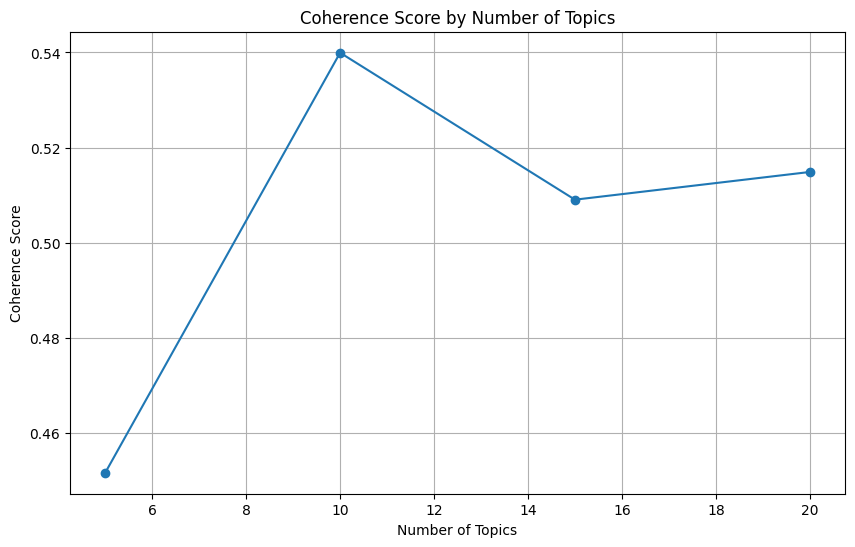

In [16]:
import os
import logging
import pickle
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Phrases, LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from pprint import pprint

class TopicModeler:
    def __init__(self, input_path):
        self.input_path = input_path
        self.docs = []
        self.dictionary = None
        self.corpus = None
        self.model = None
        self.coherence_scores = []
        self.tokenizer = RegexpTokenizer(r'\w+')
        self.lemmatizer = WordNetLemmatizer()
        logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    def load_documents(self):
        for filename in os.listdir(self.input_path):
            file_path = os.path.join(self.input_path, filename)
            if os.path.isfile(file_path) and filename.endswith('.txt'):  # Ensure it's a text file
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read().strip()
                    if isinstance(content, str):
                        self.docs.append(content)
        print(f"Loaded {len(self.docs)} documents")
        if self.docs:
            print(f"Sample document: {self.docs[0][:100]}...")

    def preprocess_documents(self):  # filtering 
        self.docs = [[token.lower() for token in self.tokenizer.tokenize(doc)] for doc in self.docs if isinstance(doc, str)]
        self.docs = [[token for token in doc if not token.isnumeric() and len(token) > 1] for doc in self.docs]
        stop_words = set(stopwords.words('english'))
        self.docs = [[word for word in doc if word not in stop_words] for doc in self.docs]
        self.docs = [[self.lemmatizer.lemmatize(token) for token in doc] for doc in self.docs]
        print(f"After preprocessing: {len(self.docs)} documents")
        if self.docs:
            print(f"Sample preprocessed document: {self.docs[0][:10]}...")

    def add_bigrams(self):
        bigram = Phrases(self.docs, min_count=5, threshold=100)
        for idx in range(len(self.docs)):
            for token in bigram[self.docs[idx]]:
                if '_' in token:
                    self.docs[idx].append(token)
        print(f"Added bigrams. Sample document: {self.docs[0][:15]}...")

    def create_dictionary_and_corpus(self):
        self.dictionary = Dictionary(self.docs)
        original_size = len(self.dictionary)
        self.dictionary.filter_extremes(no_below=2, no_above=0.9)
        self.corpus = [self.dictionary.doc2bow(doc) for doc in self.docs]
        print(f"Dictionary size: {len(self.dictionary)} (reduced from {original_size})")
        print(f"Corpus size: {len(self.corpus)}")
        if self.corpus:
            print(f"Sample corpus entry: {self.corpus[0][:10]}")

    def train_lda_model(self, num_topics=6, chunksize=2000, passes=20, iterations=400, alpha='auto', eta='auto'):
        if not self.corpus or not self.dictionary:
            raise ValueError("Corpus or dictionary is empty. Check your preprocessing steps.")
        
        print(f"Training LDA model with num_topics={num_topics}, chunksize={chunksize}, passes={passes}, iterations={iterations}, alpha={alpha}, eta={eta}")
        
        self.model = LdaModel(
            corpus=self.corpus,
            id2word=self.dictionary,
            chunksize=chunksize,
            alpha=alpha,
            eta=eta,
            iterations=iterations,
            num_topics=num_topics,
            passes=passes,
            eval_every=None,
            random_state=42
        )
        print("LDA model trained successfully")

    def print_model_info(self):
        print('Number of unique tokens: %d' % len(self.dictionary))
        print('Number of documents: %d' % len(self.corpus))
        top_topics = self.model.top_topics(self.corpus)
        avg_topic_coherence = sum([t[1] for t in top_topics]) / self.model.num_topics
        print('Average topic coherence: %.4f.' % avg_topic_coherence)
        print("\nTop topics:")
        pprint(self.model.print_topics())
        print('\nPerplexity: ', self.model.log_perplexity(self.corpus))
        coherence_model_lda = CoherenceModel(model=self.model, texts=self.docs, dictionary=self.dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print('\nCoherence Score: ', coherence_lda)
        return coherence_lda

    def visualize_topics(self):
        vis = pyLDAvis.gensim.prepare(self.model, self.corpus, self.dictionary)
        return vis

    def analyze_documents(self):
        for i, doc in enumerate(self.docs[:5]):
            bow = self.dictionary.doc2bow(doc)
            doc_topics = self.model.get_document_topics(bow)
            print(f"\nDocument {i} topics:")
            pprint(doc_topics)
            best_topic = max(doc_topics, key=lambda x: x[1])
            print(f"Best topic: {best_topic[0]}")
            print(f"Top words in this topic:")
            pprint(self.model.show_topic(best_topic[0]))
            print(f"Original document: {' '.join(doc[:30])}...")
            print()

    def save_model(self, file_path):
        if self.model is None:
            raise ValueError("No model has been trained yet.")
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        self.model.save(file_path)
        print(f"Model saved to {file_path}")

    def load_model(self, file_path):
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"No model file found at {file_path}")
        self.model = LdaModel.load(file_path)
        print(f"Model loaded from {file_path}")

    def save_dictionary_and_corpus(self, dict_path, corpus_path):
        if self.dictionary is None or self.corpus is None:
            raise ValueError("Dictionary and corpus have not been created yet.")
        os.makedirs(os.path.dirname(dict_path), exist_ok=True)
        os.makedirs(os.path.dirname(corpus_path), exist_ok=True)
        self.dictionary.save(dict_path)
        with open(corpus_path, 'wb') as f:
            pickle.dump(self.corpus, f)
        print(f"Dictionary saved to {dict_path}")
        print(f"Corpus saved to {corpus_path}")

    def load_dictionary_and_corpus(self, dict_path, corpus_path):
        if not os.path.exists(dict_path) or not os.path.exists(corpus_path):
            raise FileNotFoundError(f"Dictionary or corpus file not found.")
        self.dictionary = Dictionary.load(dict_path)
        with open(corpus_path, 'rb') as f:
            self.corpus = pickle.load(f)
        print(f"Dictionary loaded from {dict_path}")
        print(f"Corpus loaded from {corpus_path}")

    def plot_coherence_scores(self):
        """Plot coherence scores against the number of topics."""
        num_topics = [x[0] for x in self.coherence_scores]
        coherences = [x[1] for x in self.coherence_scores]
        
        plt.figure(figsize=(10, 6))
        plt.plot(num_topics, coherences, marker='o')
        plt.xlabel('Number of Topics')
        plt.ylabel('Coherence Score')
        plt.title('Coherence Score by Number of Topics')
        plt.grid(True)
        plt.show()

    def run_with_params(self, num_topics, chunksize, passes, iterations):
        try:
            self.load_documents()
            self.preprocess_documents()
            self.add_bigrams()
            self.create_dictionary_and_corpus()
            self.train_lda_model(num_topics=num_topics, chunksize=chunksize, passes=passes, iterations=iterations)
            model_dir = f"lda_models/topics_{num_topics}_passes_{passes}_iterations_{iterations}"
            self.save_model(os.path.join(model_dir, 'trained_model'))
            self.save_dictionary_and_corpus(os.path.join(model_dir, 'dictionary'), os.path.join(model_dir, 'corpus'))
            coherence_lda = self.print_model_info()
            self.coherence_scores.append((num_topics, coherence_lda))
            vis = self.visualize_topics()
            pyLDAvis.save_html(vis, os.path.join(model_dir, 'lda_visualization.html'))
            self.analyze_documents()
            return vis
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            raise

if __name__ == "__main__":
    modeler = TopicModeler('txt')

    param_combinations = [
        (5, 2000, 10, 200),
        (10, 2000, 10, 400),
        (15, 2000, 20, 200),
        (20, 2000, 20, 400)
    ]

    for num_topics, chunksize, passes, iterations in param_combinations:
        print(f"\nRunning model with parameters: num_topics={num_topics}, chunksize={chunksize}, passes={passes}, iterations={iterations}")
        modeler.run_with_params(num_topics, chunksize, passes, iterations)
    
    modeler.plot_coherence_scores()
